# Comparing COVID Fatalities


## Reading in the Data

In [2]:
import pandas as pd

# url = "http://dlsun.github.io/pods/data/covid/"
# Disable the default pandas Series repr in Google Colab to avoid cluttering the output.
# from google.colab import _reprs
# _reprs.disable_pandas_series_repr()

In [3]:
# get Portugal data
# Link: http://dlsun.github.io/pods/data/covid/portugal_2020-05-28.csv
df_PT = pd.read_csv("data/portugal_2020-05-28.csv")
df_PT

,age,sex,fatality
0,60-69,Female,0
1,60-69,Male,0
2,80+,Male,0
3,60-69,Female,0
4,50-59,Female,0
...,...,...,...
31591,40-49,Male,0
31592,30-39,Male,0
31593,80+,Female,0
31594,40-49,Female,0


In [4]:
# get Columbia data (raw)
# Link: http://dlsun.github.io/pods/data/covid/colombia_2020-05-28.csv
df_CO = pd.read_csv("data/colombia_2020-05-28.csv")
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23
...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN


## Cleaning the Colombia data

- 콜롬비아의 데이터가 포르투갈 대비 훨씬 raw함
- 일단은 클리닝 먼저 진행하고 그 후에 비교분석을 진행함

### Transforming a Categorical Variable

- 치명률(fatality)을 바로 말해주는 데이터는 없음
- 우선 상태(estado)를 치명률(fatality)로 변환함
- 환자가 사망하면 Fallecido로 표기됨
- Leve (mild), Asintomático (asymptomatic) 등의 나머지 상태도 있으나 여기서는 고려하지 않음

In [5]:
# Transforming a Categorical Variable
df_CO['Estado'].map({
    "Fallecido": 1
})

# We do not consider other states, so we fill them with 0
# and we create a new column "fatality" to store the result.
df_CO["fatality"] = df_CO['Estado'].map({
    "Fallecido": 1
}).fillna(0).astype(int)

# Display the modified DataFrame
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado,fatality
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13,0
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19,0
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15,0
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26,0
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23,0
...,...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN,0
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN,0
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN,0
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN,0


## Transforming a Quantitave Variable into a Categorical Variable

- Edad(age) 컬럼도 변환 필요
- 연령 -> 연령대로 변환 필요
- Pandas의 cut function 사용

In [6]:
# Convert the "Edad" column to "age" column
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
df_CO["age"] = pd.cut(
    df_CO["Edad"],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 120],
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"],
    right=False # right=False means the right edge is not included in the bin
)

df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado,fatality,age
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13,0,10-19
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19,0,30-39
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15,0,50-59
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26,0,50-59
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23,0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN,0,40-49
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN,0,50-59
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN,0,30-39
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN,0,10-19


## Exercises

**Exercise 1.** Calculate the overall fatality rate for Portugal. That is, calculate the distribution of fatality. Do the same for Colombia. How do they compare?

In [7]:
# Exercise 1
# Calculate the fatality rate in Portugal
df_PT['fatality'].value_counts(normalize=True)

fatality
0    0.956672
1    0.043328
Name: proportion, dtype: float64

In [8]:
# Calculate the fatality rate in Portugal
df_CO['fatality'].value_counts(normalize=True)

fatality
0    0.967594
1    0.032406
Name: proportion, dtype: float64

**Exercise 2a.** Calculate the fatality rates for each age group in Portugal. That is, calculate the conditional probabilities for each age group:

$$
P(fatality=1|age).
$$

Save the results in a Series called `fatality_rates_PT`.

In [ ]:
# Exercise 2a

# unstack() works like pivot_table, but it is more efficient for this case
crosstab_PT = df_PT[['age', 'fatality']].value_counts(normalize=True).unstack().fillna(0)
# calculate the marginal totals (axis=columns means sum across rows)
fatality_marginal = crosstab_PT.sum(axis="columns")
# then we divide each row by total and select the fatality rate 
fatality_rates_PT = crosstab_PT.div(fatality_marginal, axis="rows").loc[:, 1]
fatality_rates_PT

age
0-9      0.000000
10-19    0.000000
20-29    0.000243
30-39    0.000211
40-49    0.002822
50-59    0.007995
60-69    0.035017
70-79    0.106031
80+      0.205180
Name: 1, dtype: float64

**Exercise 2b.** Calculate the fatality rate for each age group for Colombia. Save the results in a Series called `fatality_rates_CO`.

In [ ]:
# Exercise 2b

# unstack() works like pivot_table, but it is more efficient for this case
crosstab_CO = df_CO[['age', 'fatality']].value_counts(normalize=True).unstack().fillna(0)
# calculate the marginal totals (axis=columns means sum across rows)
fatality_marginal = crosstab_CO.sum(axis="columns")
# then we divide each row by total and select the fatality rate
fatality_rates_CO = crosstab_CO.div(fatality_marginal, axis="rows").loc[:, 1]
fatality_rates_CO

age
0-9      0.004525
10-19    0.000513
20-29    0.002316
30-39    0.004274
40-49    0.015125
50-59    0.036823
60-69    0.097909
70-79    0.191585
80+      0.278832
Name: 1, dtype: float64

**Exercise 3a.** Combine the Colombia and Portugal results into a single `DataFrame` for plotting.

In [ ]:
# Compare the result of pd.concat()
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
# axis=0 means concatenate along indexes (rows)
pd.concat([fatality_rates_PT, fatality_rates_CO], axis=0, keys=["Portugal", "Colombia"])

# fatality_rates_combined

          age  
Portugal  0-9      0.000000
          10-19    0.000000
          20-29    0.000243
          30-39    0.000211
          40-49    0.002822
          50-59    0.007995
          60-69    0.035017
          70-79    0.106031
          80+      0.205180
Colombia  0-9      0.004525
          10-19    0.000513
          20-29    0.002316
          30-39    0.004274
          40-49    0.015125
          50-59    0.036823
          60-69    0.097909
          70-79    0.191585
          80+      0.278832
Name: 1, dtype: float64

In [25]:
# axis=1 means concatenate along columns
pd.concat([fatality_rates_PT, fatality_rates_CO], axis=1, keys=["Portugal", "Colombia"])


,Portugal,Colombia
age,,
0-9,0.000000,0.004525
10-19,0.000000,0.000513
20-29,0.000243,0.002316
30-39,0.000211,0.004274
40-49,0.002822,0.015125
50-59,0.007995,0.036823
60-69,0.035017,0.097909
70-79,0.106031,0.191585
80+,0.205180,0.278832


In [27]:
# then, we will use...

fatality_rates_combined = pd.concat([fatality_rates_PT, fatality_rates_CO], axis=1, keys=["Portugal", "Colombia"])
fatality_rates_combined

,Portugal,Colombia
age,,
0-9,0.000000,0.004525
10-19,0.000000,0.000513
20-29,0.000243,0.002316
30-39,0.000211,0.004274
40-49,0.002822,0.015125
50-59,0.007995,0.036823
60-69,0.035017,0.097909
70-79,0.106031,0.191585
80+,0.205180,0.278832


**Exercise 3b.** Make a bar plot comparing the fatality rates for each age group in Colombia and Portugal. Do you notice anything strange? (Hint: Take a look at your answer to Exercise 1.) Can you explain what is going on?

<Axes: title={'center': 'Fatality Rates by Age Group in Portugal and Colombia'}, xlabel='age'>

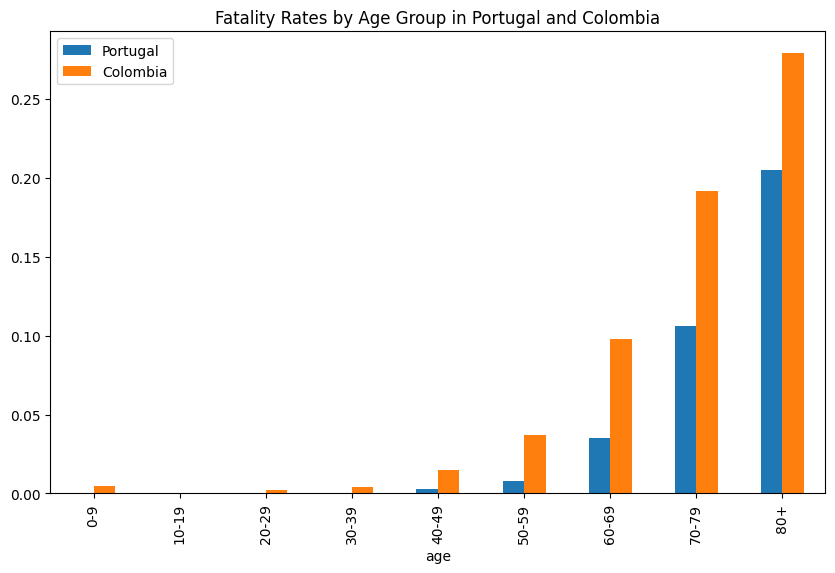

In [28]:
fatality_rates_combined.plot(kind='bar', figsize=(10, 6), title='Fatality Rates by Age Group in Portugal and Colombia')